## Load data

In [5]:
import pandas as pd
import ast
import numpy as np

# Load in data
admissions = 'tedsa_puf_2019.csv'
df = pd.read_csv(f'../../Downloads/{admissions}')

## Compare SUB1 groups with DSMCRIT

In [6]:
sub1 = df['SUB1']
for i in [1,2,3,4,8,9,10,11,12,13,14,15,16,17,18,19]:
    sub1 = sub1.replace(i, 'Other')
# sub1 = sub1.replace(-9, np.nan)

dsmcrit = df['DSMCRIT']
for i in [1,2,3,4,6,7,8,9,10,11,13,14,15,16,17,18,19]:
    dsmcrit = dsmcrit.replace(i, 'Other')
# dsmcrit = dsmcrit.replace(-9, np.nan)

In [7]:
df0 = pd.DataFrame()
df0['SUB1'] = sub1
df0['DSMCRIT'] = dsmcrit

df0.value_counts()

print('See "SUB1 DSMCRIT overlap.xlsx" file for a better breakdown')

See "SUB1 DSMCRIT overlap.xlsx" file for a better breakdown


## Filter out select rows and columns

In [8]:
df.columns

Index(['ADMYR', 'CASEID', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'SERVICES',
       'DETCRIM', 'NOPRIOR', 'PSOURCE', 'ARRESTS', 'EMPLOY', 'METHUSE',
       'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'DSMCRIT',
       'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3',
       'ROUTE1', 'ROUTE2', 'ROUTE3', 'FREQ1', 'FREQ2', 'FREQ3', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG',
       'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG',
       'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG',
       'DIVISION', 'REGION', 'IDU', 'ALCDRUG'],
      dtype='object')

In [9]:
# Get count of original number of rows
old_rows = len(df)

# Drop Puerto Rico
# df = df[df['STFIPS'] != 72]

# Drop defined columns
columns_to_drop = ['ADMYR', 'CASEID', 'CBSA2010']  # consider also dropping 'STFIPS'
df = df.drop(columns=columns_to_drop)
print(f'Dropped {len(columns_to_drop)} columns ({len(df.columns)} remain)')

# Drop values where dependent variable is unknown
df = df[df['METHUSE'] != -9]

# Only keep patients admitted with self-described use of an opioid as their primary substance use (i.e., SUB1 = 5, 6, or 7)
df = df[df['SUB1'].between(5, 7)]
new_rows = len(df)
percent_change = round(100*(old_rows-new_rows)/old_rows, 1)
print(f'Dropped {"{:,}".format(old_rows-new_rows)} observations or {percent_change}% of the data ({"{:,}".format(new_rows)} rows remain)')

df = df.reset_index(drop='index')

Dropped 3 columns (59 remain)
Dropped 1,340,233 observations or 71.9% of the data (524,134 rows remain)


## Balance dataset

In [10]:
# Split into two dataframes, printing result
df_ones = df[df['METHUSE']==1]
df_twos = df[df['METHUSE']==2]
print('Classes before down-sampling:', len(df_ones), len(df_twos))

# Sample down df_twos to the length of df_ones, printing result
ratio = len(df_ones)/len(df_twos)
df_twos = df_twos.sample(frac=ratio)
print('Classes after down-sampling:', len(df_ones), len(df_twos))

# Recombine and shuffle for good measure
df = pd.concat([df_ones, df_twos], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

Classes before down-sampling: 211743 312391
Classes after down-sampling: 211743 211743


In [11]:
df

,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,EMPLOY,METHUSE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,17,2,1,4,-9,4,3,0,3,2,...,0,0,0,0,0,0,3,2,0,3
1,34,3,1,7,-9,2,1,0,4,1,...,0,0,0,0,0,0,2,1,1,2
2,24,3,1,5,-9,5,6,0,4,2,...,0,0,0,0,0,0,5,3,1,2
3,42,3,1,7,3,4,7,0,2,1,...,0,0,0,0,0,0,2,1,1,2
4,24,2,1,7,-9,3,1,0,3,1,...,0,0,0,0,0,0,5,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423481,34,3,1,6,3,4,7,0,1,1,...,0,0,0,0,0,0,2,1,1,2
423482,24,-9,-9,7,-9,0,1,-9,2,1,...,0,0,0,0,0,0,5,3,0,2
423483,37,3,1,2,-9,0,1,0,3,2,...,0,0,0,0,0,0,5,3,1,2
423484,25,1,1,2,-9,5,1,0,4,2,...,0,0,0,0,0,0,1,1,1,2


## Make dataset human-readable

In [12]:
# Load in variable dictionary
with open('VariableDictionary.txt') as file:
    variable_dict_string = file.read()
    variable_dict = ast.literal_eval(variable_dict_string)

# Rename entries in column according to dictionary
df2 = df.copy()
for col, col_dict in variable_dict.items():
    for old_value, new_value in variable_dict[col].items():
        df2[col] = df2[col].replace(old_value, new_value)

# Rename "-9" values as "Unknown"
for col in df2.columns:
    df2[col] = df2[col].replace(-9, 'Unknown')

In [13]:
# Merge DETNLF (detailed not in labor force) into EMPLOY==4 (not in labor force)
detailed_employ = []

for idx, value in df2.iterrows():
    if value['EMPLOY'] == 'NotInLaborForce':
        if value['DETNLF'] == 'Unknown':
            # Assign 'UnknownNotInLaborForce' if 'NotInLaborForce' and 'Unknown'
            detailed_employ.append('UnknownNotInLaborForce')
        else:
            # Otherwise, assign as the DETNLF value
            detailed_employ.append(value['DETNLF'])
    else:
        # Assign the EMPLOY value if not 'NotInLaborForce'
        detailed_employ.append(value['EMPLOY'])

# Add a new column for detailed employment and drop the two source columns
df2['DETEMPLOY'] = detailed_employ
df2 = df2.drop(columns=['EMPLOY', 'DETNLF'])

In [14]:
df2

,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,METHUSE,PSYPROB,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,DETEMPLOY
0,IL,Grade9To11,NeverMarried,RehabResShortTerm,Unknown,4PriorTreatments,OtherHealthCareProvider,0Arrest,NoMethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,EastNorthCentral,Midwest,NoIDU,Alcohol&Drugs,Unemployed
1,NJ,Grade12OrGED,NeverMarried,AmbulatoryNonIntensiveOutpatient,Unknown,2PriorTreatments,Individual,0Arrest,MethUse,Yes,...,NotReported,NotReported,NotReported,NotReported,NotReported,MiddleAtlantic,Northeast,IDU,OtherDrugs,OtherNotInLaborForce
2,MD,Grade12OrGED,NeverMarried,RehabResLongTerm,Unknown,5PlusPriorTreatments,OtherReferral,0Arrest,NoMethUse,Yes,...,NotReported,NotReported,NotReported,NotReported,NotReported,SouthAtlantic,South,IDU,OtherDrugs,OtherNotInLaborForce
3,PA,Grade12OrGED,NeverMarried,AmbulatoryNonIntensiveOutpatient,ProbationOrParole,4PriorTreatments,CourtReferral,0Arrest,MethUse,Yes,...,NotReported,NotReported,NotReported,NotReported,NotReported,MiddleAtlantic,Northeast,IDU,OtherDrugs,PartTime
4,MD,Grade9To11,NeverMarried,AmbulatoryNonIntensiveOutpatient,Unknown,3PriorTreatments,Individual,0Arrest,MethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,SouthAtlantic,South,IDU,OtherDrugs,Unemployed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423481,NJ,Grade12OrGED,NeverMarried,AmbulatoryIntensiveOutpatient,ProbationOrParole,4PriorTreatments,CourtReferral,0Arrest,MethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,MiddleAtlantic,Northeast,IDU,OtherDrugs,FullTime
423482,MD,Unknown,Unknown,AmbulatoryNonIntensiveOutpatient,Unknown,0PriorTreatments,Individual,Unknown,MethUse,Unknown,...,NotReported,NotReported,NotReported,NotReported,NotReported,SouthAtlantic,South,NoIDU,OtherDrugs,PartTime
423483,NC,Grade12OrGED,NeverMarried,Detox24hFreeStandingRes,Unknown,0PriorTreatments,Individual,0Arrest,NoMethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,SouthAtlantic,South,IDU,OtherDrugs,Unemployed
423484,MA,Grade8OrLess,NeverMarried,Detox24hFreeStandingRes,Unknown,5PlusPriorTreatments,Individual,0Arrest,NoMethUse,Yes,...,NotReported,NotReported,NotReported,NotReported,NotReported,NewEngland,Northeast,IDU,OtherDrugs,OtherNotInLaborForce


## Make machine-readable dataset (for exporting)

In [15]:
# Remove dependent variable
df2['METHUSE'] = df2['METHUSE'].replace('MethUse', 1)
df2['METHUSE'] = df2['METHUSE'].replace('NoMethUse', 0)

# df2.to_csv('human_readable_data.csv', index=False)

In [16]:
df3 = df2.copy()

# Convert categorical variables to dummy variables
df3 = pd.get_dummies(df3)

# Add intercept
df3.insert(0, 'Intercept', 1)

# Save dataframe to csv and show below
# df3.to_csv('data.csv', index=False)
df3

,Intercept,METHUSE,STFIPS_AK,STFIPS_AL,STFIPS_AR,STFIPS_AZ,STFIPS_CA,STFIPS_CO,STFIPS_CT,STFIPS_DC,...,DETEMPLOY_FullTime,DETEMPLOY_Homemaker,DETEMPLOY_InstitutionResident,DETEMPLOY_OtherNotInLaborForce,DETEMPLOY_PartTime,DETEMPLOY_RetiredOrDisabled,DETEMPLOY_Student,DETEMPLOY_Unemployed,DETEMPLOY_Unknown,DETEMPLOY_UnknownNotInLaborForce
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423481,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
423482,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
423483,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
423484,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Make machine-readable dataset (encoding)

In [17]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

df4 = df2.copy()
# df4 = df4.sample(frac=1)  # small size for testing code

In [18]:
from sklearn.preprocessing import OrdinalEncoder

df4['STFIPS'] = df4['STFIPS'].astype('category').cat.codes
df4['EDUC'] = OrdinalEncoder(categories=[['Unknown', 'Grade8OrLess', 'Grade9To11', 'Grade12OrGED', '1To3yCollege', '4yCollegePlus']]).fit_transform(df4[['EDUC']])
df4['MARSTAT'] = df4['MARSTAT'].astype('category').cat.codes
df4['SERVICES'] = df4['SERVICES'].astype('category').cat.codes
df4['DETCRIM'] = df4['DETCRIM'].astype('category').cat.codes
df4['NOPRIOR'] = OrdinalEncoder(categories=[['Unknown', '0PriorTreatments', '1PriorTreatments', '2PriorTreatments', '3PriorTreatments',
                                            '4PriorTreatments', '5PlusPriorTreatments']]).fit_transform(df4[['NOPRIOR']])
df4['PSOURCE'] = df4['PSOURCE'].astype('category').cat.codes
df4['ARRESTS'] = OrdinalEncoder(categories=[['Unknown', '0Arrest', '1Arrest', '2PlusArrest']]).fit_transform(df4[['ARRESTS']])
# df4['METHUSE'] = df4['METHUSE'].astype('category').cat.codes
df4['PSYPROB'] = df4['PSYPROB'].astype('category').cat.codes
df4['PREG'] = df4['PREG'].astype('category').cat.codes
df4['GENDER'] = df4['GENDER'].astype('category').cat.codes
df4['VET'] = df4['VET'].astype('category').cat.codes
df4['LIVARAG'] = df4['LIVARAG'].astype('category').cat.codes
df4['DAYWAIT'] = OrdinalEncoder(categories=[['Unknown', '0DaysWait', '1To7DaysWait', '8To14DaysWait', '15To30DaysWait',
                                            '31PlusDaysWait']]).fit_transform(df4[['DAYWAIT']])
df4['DSMCRIT'] = df4['DSMCRIT'].astype('category').cat.codes
df4['AGE'] = OrdinalEncoder(categories=[['Age12To14', 'Age15To17', 'Age18To20', 'Age21To24', 'Age25To29', 'Age30To34', 'Age35To39', 'Age40To44',
                                        'Age45To49', 'Age50To54', 'Age55To64', 'Age65Plus' ]]).fit_transform(df4[['AGE']])
df4['RACE'] = df4['RACE'].astype('category').cat.codes
df4['ETHNIC'] = df4['ETHNIC'].astype('category').cat.codes
df4['PRIMINC'] = df4['PRIMINC'].astype('category').cat.codes
df4['SUB1'] = df4['SUB1'].astype('category').cat.codes
df4['SUB2'] = df4['SUB2'].astype('category').cat.codes
df4['SUB3'] = df4['SUB3'].astype('category').cat.codes
df4['ROUTE1'] = df4['ROUTE1'].astype('category').cat.codes
df4['ROUTE2'] = df4['ROUTE2'].astype('category').cat.codes
df4['ROUTE3'] = df4['ROUTE3'].astype('category').cat.codes
df4['FREQ1'] = OrdinalEncoder(categories=[['Unknown', 'NoUsePastMonth', 'SomeUse', 'DailyUse']]).fit_transform(df4[['FREQ1']])
df4['FREQ2'] = OrdinalEncoder(categories=[['Unknown', 'NoUsePastMonth', 'SomeUse', 'DailyUse']]).fit_transform(df4[['FREQ2']])
df4['FREQ3'] = OrdinalEncoder(categories=[['Unknown', 'NoUsePastMonth', 'SomeUse', 'DailyUse']]).fit_transform(df4[['FREQ3']])
df4['FRSTUSE1'] = OrdinalEncoder(categories=[['Unknown', '11yLess', '12To14y', '15To17y', '18To20y', '21To24y', '25To29y',
                                             '30yPlus']]).fit_transform(df4[['FRSTUSE1']])
df4['FRSTUSE2'] = OrdinalEncoder(categories=[['Unknown', '11yLess', '12To14y', '15To17y', '18To20y', '21To24y', '25To29y',
                                             '30yPlus']]).fit_transform(df4[['FRSTUSE2']])
df4['FRSTUSE3'] = OrdinalEncoder(categories=[['Unknown', '11yLess', '12To14y', '15To17y', '18To20y', '21To24y', '25To29y',
                                             '30yPlus']]).fit_transform(df4[['FRSTUSE3']])
df4['HLTHINS'] = df4['HLTHINS'].astype('category').cat.codes
df4['PRIMPAY'] = df4['PRIMPAY'].astype('category').cat.codes
df4['FREQ_ATND_SELF_HELP'] = OrdinalEncoder(categories=[['Unknown', 'NoAttendance', 'SomeAttendance', '1To3TimesPastMonth', '4To7TimesPastMonth',
                                                        '8To30TimesPastMonth']]).fit_transform(df4[['FREQ_ATND_SELF_HELP']])
df4['ALCFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['ALCFLG']])
df4['COKEFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['COKEFLG']])
df4['MARFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['MARFLG']])
df4['HERFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['HERFLG']])
df4['METHFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['METHFLG']])
df4['OPSYNFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['OPSYNFLG']])
df4['PCPFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['PCPFLG']])
df4['HALLFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['HALLFLG']])
df4['MTHAMFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['MTHAMFLG']])
df4['AMPHFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['AMPHFLG']])
df4['STIMFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['STIMFLG']])
df4['BENZFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['BENZFLG']])
df4['TRNQFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['TRNQFLG']])
df4['BARBFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['BARBFLG']])
df4['SEDHPFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['SEDHPFLG']])
df4['INHFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['INHFLG']])
df4['OTCFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['OTCFLG']])
df4['OTHERFLG'] = OrdinalEncoder(categories=[['NotReported', 'Reported']]).fit_transform(df4[['OTHERFLG']])
df4['DIVISION'] = df4['DIVISION'].astype('category').cat.codes
df4['REGION'] = df4['REGION'].astype('category').cat.codes
df4['IDU'] = OrdinalEncoder(categories=[['NoIDU', 'IDU']]).fit_transform(df4[['IDU']])
df4['ALCDRUG'] = OrdinalEncoder(categories=[['OtherDrugs', 'Alcohol&Drugs']]).fit_transform(df4[['ALCDRUG']])
df4['DETEMPLOY'] = df4['DETEMPLOY'].astype('category').cat.codes

In [51]:
# Check what is happening with the state distributions (Montana a US territory?)

,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,METHUSE,PSYPROB,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,DETEMPLOY
0,13,2.0,1,7,8,5.0,4,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1.0,7
1,30,3.0,1,2,8,3.0,3,1.0,1,2,...,0.0,0.0,0.0,0.0,0.0,2,1,1.0,0.0,3
2,19,3.0,1,6,8,6.0,5,1.0,0,2,...,0.0,0.0,0.0,0.0,0.0,6,2,1.0,0.0,3
3,36,3.0,1,2,7,5.0,0,1.0,1,2,...,0.0,0.0,0.0,0.0,0.0,2,1,1.0,0.0,4
4,19,2.0,1,2,8,4.0,3,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,6,2,1.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423481,30,3.0,1,1,7,5.0,0,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,2,1,1.0,0.0,0
423482,19,0.0,4,2,8,1.0,3,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,6,2,0.0,0.0,4
423483,26,3.0,1,3,8,1.0,3,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,6,2,1.0,0.0,7
423484,18,1.0,1,3,8,6.0,3,1.0,0,2,...,0.0,0.0,0.0,0.0,0.0,4,1,1.0,0.0,3


In [52]:
df2.groupby('STFIPS').count()/len(df2)

,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,METHUSE,PSYPROB,PREG,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,DETEMPLOY
STFIPS,,,,,,,,,,,,,,,,,,,,,
AK,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,...,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178
AL,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,...,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588
AR,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,...,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551
AZ,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,...,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450
CA,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,...,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182
CO,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,...,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730
CT,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,...,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511
DC,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,...,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569
DE,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,...,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840


In [53]:
df4.groupby('STFIPS').count()/len(df4)

,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,METHUSE,PSYPROB,PREG,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,DETEMPLOY
STFIPS,,,,,,,,,,,,,,,,,,,,,
0,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,...,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178,0.003178
1,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,...,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588,0.010588
2,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,...,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551
3,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,...,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450,0.017450
4,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,...,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182,0.086182
5,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,...,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730,0.024730
6,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,...,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511,0.042511
7,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,...,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569,0.002569
8,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,...,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840,0.015840


In [19]:
df[['NOPRIOR']]

,NOPRIOR
0,4
1,2
2,5
3,4
4,3
...,...
423481,4
423482,0
423483,0
423484,5


In [20]:
df4.dtypes

STFIPS                    int8
EDUC                   float64
MARSTAT                   int8
SERVICES                  int8
DETCRIM                   int8
NOPRIOR                float64
PSOURCE                   int8
ARRESTS                float64
METHUSE                  int64
PSYPROB                   int8
PREG                      int8
GENDER                    int8
VET                       int8
LIVARAG                   int8
DAYWAIT                float64
DSMCRIT                   int8
AGE                    float64
RACE                      int8
ETHNIC                    int8
PRIMINC                   int8
SUB1                      int8
SUB2                      int8
SUB3                      int8
ROUTE1                    int8
ROUTE2                    int8
ROUTE3                    int8
FREQ1                  float64
FREQ2                  float64
FREQ3                  float64
FRSTUSE1               float64
FRSTUSE2               float64
FRSTUSE3               float64
HLTHINS 

In [21]:
df2.iloc[209372]

STFIPS                                               MD
EDUC                                            Unknown
MARSTAT                                    NeverMarried
SERVICES               AmbulatoryNonIntensiveOutpatient
DETCRIM                                         Unknown
NOPRIOR                                0PriorTreatments
PSOURCE                                   OtherReferral
ARRESTS                                         Unknown
METHUSE                                               1
PSYPROB                                         Unknown
PREG                                            Unknown
GENDER                                             Male
VET                                             Unknown
LIVARAG                                         Unknown
DAYWAIT                                       0DaysWait
DSMCRIT                                OpioidDependence
AGE                                           Age35To39
RACE                                            

In [22]:
df4

,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,METHUSE,PSYPROB,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,DETEMPLOY
0,13,2.0,1,7,8,5.0,4,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1.0,7
1,30,3.0,1,2,8,3.0,3,1.0,1,2,...,0.0,0.0,0.0,0.0,0.0,2,1,1.0,0.0,3
2,19,3.0,1,6,8,6.0,5,1.0,0,2,...,0.0,0.0,0.0,0.0,0.0,6,2,1.0,0.0,3
3,36,3.0,1,2,7,5.0,0,1.0,1,2,...,0.0,0.0,0.0,0.0,0.0,2,1,1.0,0.0,4
4,19,2.0,1,2,8,4.0,3,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,6,2,1.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423481,30,3.0,1,1,7,5.0,0,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,2,1,1.0,0.0,0
423482,19,0.0,4,2,8,1.0,3,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,6,2,0.0,0.0,4
423483,26,3.0,1,3,8,1.0,3,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,6,2,1.0,0.0,7
423484,18,1.0,1,3,8,6.0,3,1.0,0,2,...,0.0,0.0,0.0,0.0,0.0,4,1,1.0,0.0,3


### Train test split

## Train XG Boost model

In [23]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X = df4.drop('METHUSE', axis=1)
y = df4['METHUSE'].astype('float')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [20]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

# Search the parameter grid
# Docs: https://xgboost.readthedocs.io/en/latest/parameter.html
# https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook#2.-XGBoost-hyperparameters-
space={'colsample_bytree': hp.quniform('colsample_bytree', 0.1, 1, 0.01),
       'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
       'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
       'learning_rate': hp.quniform('learning_rate', 0.01, 0.5, 0.01),
       'max_depth': hp.quniform("max_depth", 3, 27, 1),
       'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
       'n_estimators': hp.choice('n_estimators', range(100, 1000)),
       'reg_alpha' : hp.quniform('reg_alpha', 40, 180, 1),
       'reg_lambda' : hp.uniform('reg_lambda', 0, 1),
       'subsample': hp.quniform('subsample', 0.5, 1, 0.05)
    }

def objective(space):
    clf=xgb.XGBClassifier(colsample_bytree=round(space['colsample_bytree'], 0),
                          early_stopping_rounds=10,
                          eta=space['eta'],
                          eval_metric='auc',
                          gamma=space['gamma'],
                          learning_rate=space['learning_rate'],
                          max_depth=int(round(space['max_depth'], 0)),
                          min_child_weight=space['min_child_weight'],
                          n_estimators=space['n_estimators'],
                          objective='binary:logistic',
                          reg_alpha=space['reg_alpha'],
                          reg_lambda=space['reg_lambda'],
                          seed=24,
                          subsample=round(space['subsample'], 0))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train, eval_set=evaluation, verbose=False)

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", round(accuracy, 3))
    return {'loss': -accuracy, 'status': STATUS_OK }

In [22]:
# Begin training
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 50,          # <-- bring back to 50
                        trials = trials)

In [1]:
"""
# Best from 100 runs (50 would have done just fine)

{'colsample_bytree': 0.55,
 'eta': 0.15000000000000002,
 'gamma': 0.8,
 'learning_rate': 0.27,
 'max_depth': 20.0,
 'min_child_weight': 3.0,
 'n_estimators': 598,
 'reg_alpha': 40.0,
 'reg_lambda': 0.38166847419409755,
 'subsample': 0.6000000000000001}
"""

best_hyperparams = {'colsample_bytree': 0.55,
                     'eta': 0.15000000000000002,
                     'gamma': 0.8,
                     'learning_rate': 0.27,
                     'max_depth': 20.0,
                     'min_child_weight': 3.0,
                     'n_estimators': 598,
                     'reg_alpha': 40.0,
                     'reg_lambda': 0.38166847419409755,
                     'subsample': 0.6000000000000001}

best_hyperparams

{'colsample_bytree': 0.55,
 'eta': 0.15000000000000002,
 'gamma': 0.8,
 'learning_rate': 0.27,
 'max_depth': 20.0,
 'min_child_weight': 3.0,
 'n_estimators': 598,
 'reg_alpha': 40.0,
 'reg_lambda': 0.38166847419409755,
 'subsample': 0.6000000000000001}

In [21]:
# import xgboost as xgb
# import shap
# import numpy as np
#
# # Train XGBoost model
# model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=24)
# model.fit(X_train, y_train)

In [22]:
stop

NameError: name 'stop' is not defined

### Interpretability

In [25]:
import xgboost as xgb
import shap
import numpy as np

best_hyperparams_formatted = best_hyperparams.copy()
best_hyperparams_formatted['max_depth'] = int(best_hyperparams['max_depth'])
best_hyperparams_formatted['eval_metric'] = 'auc'
best_hyperparams_formatted['objective'] = 'binary:logistic'
best_hyperparams_formatted['seed'] = 24

best_model = xgb.XGBClassifier(**best_hyperparams_formatted)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.55,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.15000000000000002, eval_metric='auc', gamma=0.8, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.27, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=20, max_leaves=0,
              min_child_weight=3.0, missing=nan, monotone_constraints='()',
              n_estimators=598, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=24, reg_alpha=40.0, ...)

In [39]:
# from sklearn.metrics import accuracy_score
#
# # Assuming you have already trained the model and made predictions as shown in the previous example
# # y_pred contains the predicted class labels (0 or 1) or probabilities
#
# # Convert predicted probabilities to class labels (0 or 1)
# y_pred = best_model.predict(X_test)
# y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
#
# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred_binary)
# print(f'Accuracy on the testing data: {accuracy}')

Accuracy on the testing data: 0.8504096909017923


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


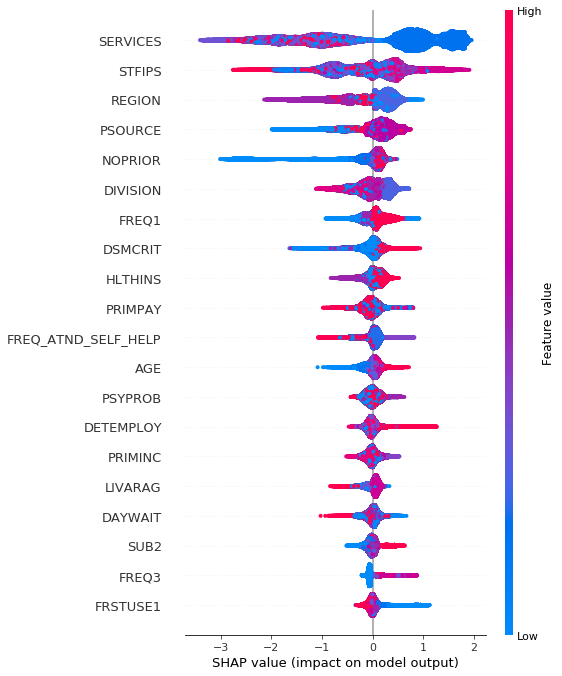

In [40]:
# Generate Shapley values
explainer = shap.Explainer(best_model)
shap_values = explainer(X) # test if I should use X or X_test

# Plot Shapley summary plot
shap.summary_plot(shap_values, X)

In [43]:
shap_values[0]

.values =
array([-5.7294375e-01,  6.9352917e-02,  1.0949368e-02, -9.9015886e-01,
        3.3481002e-02, -2.7187292e-02,  6.6232726e-02,  8.3646532e-03,
       -9.0188965e-02, -7.7682860e-02, -7.8057669e-02, -6.7472528e-03,
       -1.6454375e-01, -1.0720148e-01, -1.3826364e-01, -2.5965201e-02,
       -8.8903241e-02, -1.0808299e-02, -1.0854960e-02,  1.6669365e-02,
       -1.2796610e-02, -4.1467533e-02, -6.4673959e-03, -6.2507905e-02,
       -6.2915146e-02,  6.9665924e-02,  3.4768716e-02,  1.5244094e-01,
        3.6586553e-02, -8.2047462e-02, -2.2249885e-02, -3.3832532e-01,
        7.1961656e-02, -5.7907742e-02, -2.0881692e-02,  4.4176128e-02,
        2.2240169e-02,  1.6997125e-02, -1.5033637e-03,  1.4177665e-02,
        2.0352991e-05,  2.3151397e-05,  2.9209811e-02,  4.4161998e-04,
       -1.0310292e-03, -1.6268634e-03,  0.0000000e+00,  4.1856229e-06,
        1.3115717e-04, -3.1434044e-07, -4.1390363e-06,  1.0181603e-04,
       -4.7972897e-01,  3.4559567e-02,  1.1904131e-02, -3.9673108e-

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


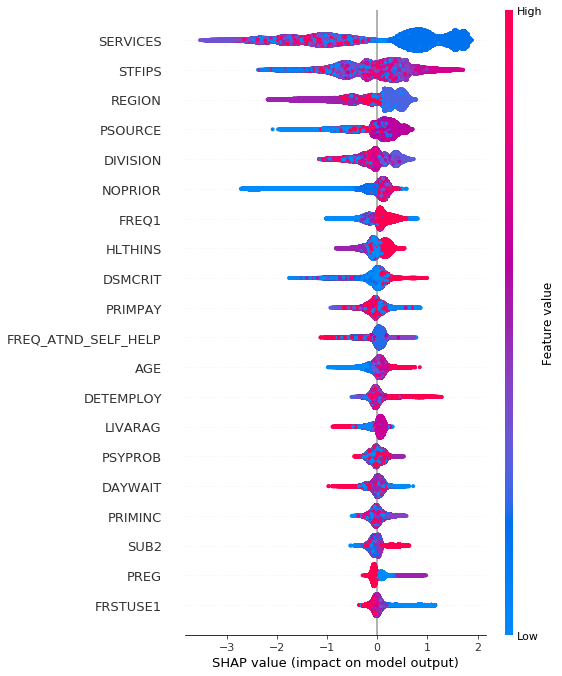

In [25]:
# Generate Shapley values
explainer = shap.Explainer(best_model)
shap_values = explainer(X) # test if I should use X or X_test

# Plot Shapley summary plot
shap.summary_plot(shap_values, X)

In [41]:
shap.initjs()

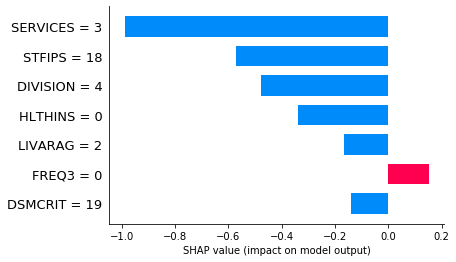

In [42]:
shap.bar_plot(shap_values=shap_values[0].values, features=X_test.iloc[0,:])

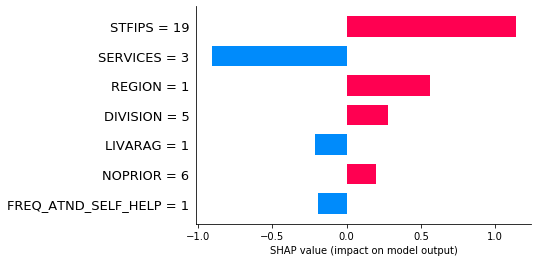

In [28]:
shap.bar_plot(shap_values=shap_values[0].values, features=X_test.iloc[0,:])

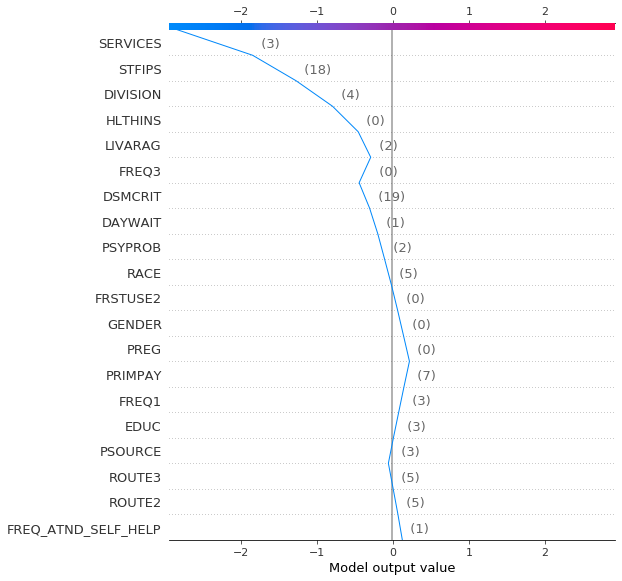

In [44]:
# Decision plot for single sample
shap.decision_plot(explainer.expected_value, shap_values=shap_values[0].values, features=X_test.iloc[0,:])

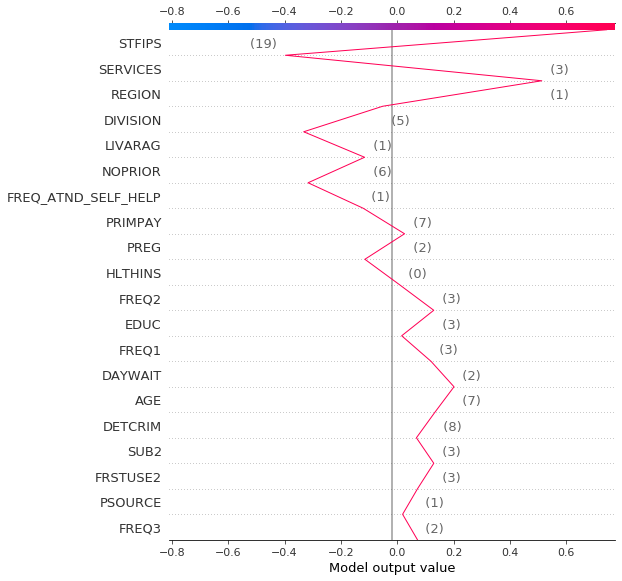

In [29]:
# Decision plot for single sample
shap.decision_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0,:])

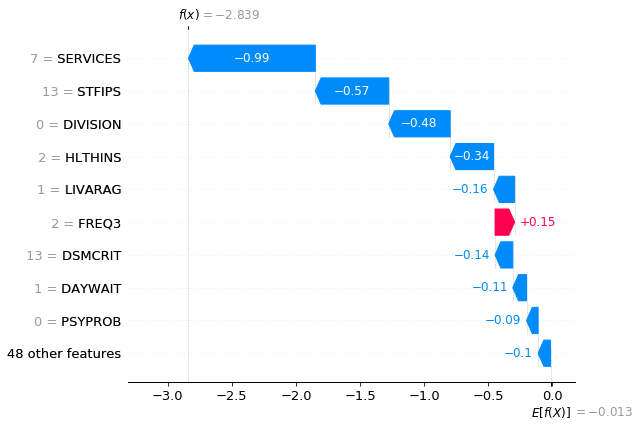

In [45]:
# shap_values[0].values
shap.waterfall_plot(shap_values=shap_values[0])

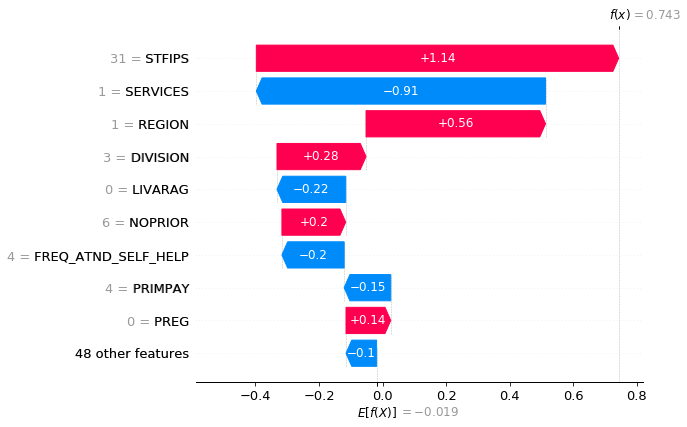

In [30]:
# shap_values[0].values
shap.waterfall_plot(shap_values=shap_values[0])

In [46]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values=shap_values[0].values, features=X_test.iloc[0,:])

In [31]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values=shap_values[0].values, features=X_test.iloc[0,:])

In [47]:
def absolute_share(input_list):
    absolute_list = [abs(i) for i in input_list]
    absolute_share_list = [j/sum(absolute_list) for j in absolute_list]
    return absolute_share_list

# Show table of top Shapley values
feature_names = X.columns
result = pd.DataFrame(shap_values.values, columns=feature_names)
values = np.abs(result.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, values)), columns=['feature_name','feature_importance'])
shap_importance.sort_values(by=['feature_importance'], ascending=False, inplace=True)
shap_importance.head(10)

,feature_name,feature_importance
3,SERVICES,1.192367
0,STFIPS,0.551131
53,REGION,0.420149
6,PSOURCE,0.312829
5,NOPRIOR,0.257878
52,DIVISION,0.243313
25,FREQ1,0.174383
14,DSMCRIT,0.139683
31,HLTHINS,0.133729
32,PRIMPAY,0.121739


In [48]:
# Show table of top Shapley values
feature_names = X.columns
result = pd.DataFrame(shap_values.values, columns=feature_names)
values = np.abs(result.values).mean(0)
abs_values = absolute_share(np.abs(result.values).mean(0))
shap_importance = pd.DataFrame(list(zip(feature_names, values, abs_values)), columns=['feature_name','feature_importance', 'abs_feature_importance'])
shap_importance.sort_values(by=['feature_importance'], ascending=False, inplace=True)
shap_importance.reset_index(drop=True)

,feature_name,feature_importance,abs_feature_importance
0,SERVICES,1.192367,2.122754e-01
1,STFIPS,0.551131,9.811701e-02
2,REGION,0.420149,7.479845e-02
3,PSOURCE,0.312829,5.569256e-02
4,NOPRIOR,0.257878,4.590960e-02
5,DIVISION,0.243313,4.331658e-02
6,FREQ1,0.174383,3.104521e-02
7,DSMCRIT,0.139683,2.486748e-02
8,HLTHINS,0.133729,2.380765e-02
9,PRIMPAY,0.121739,2.167297e-02


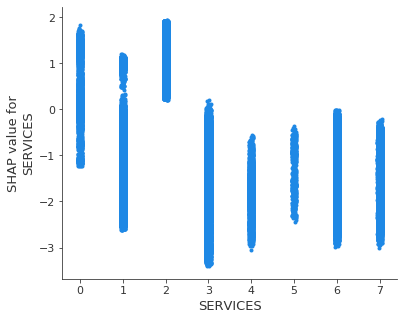

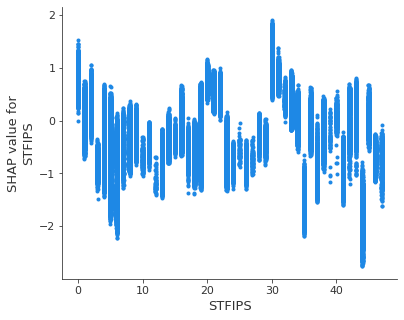

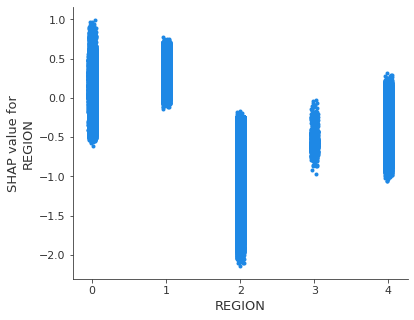

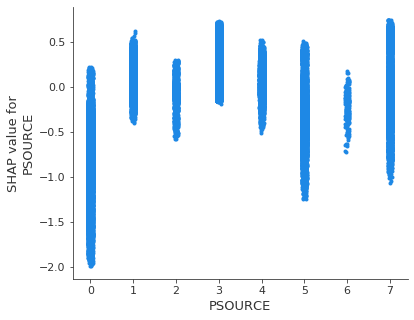

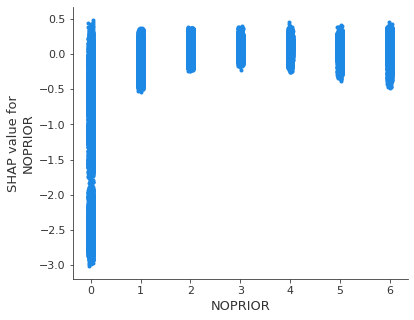

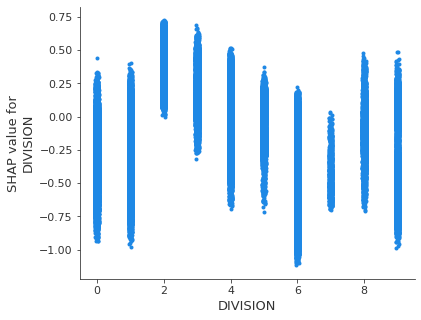

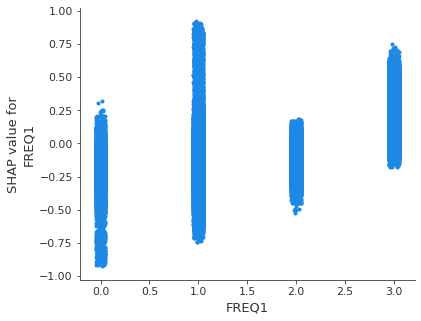

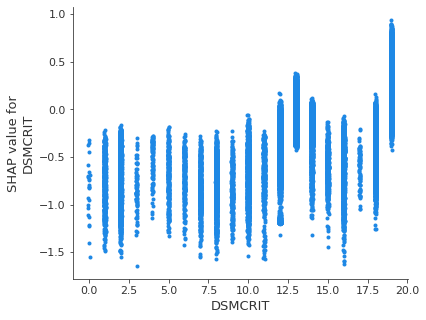

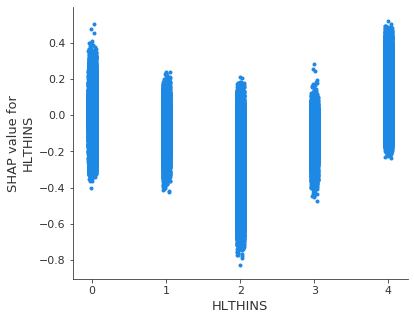

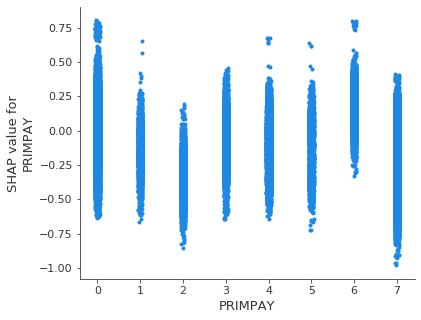

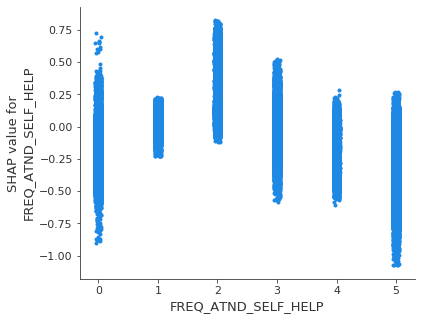

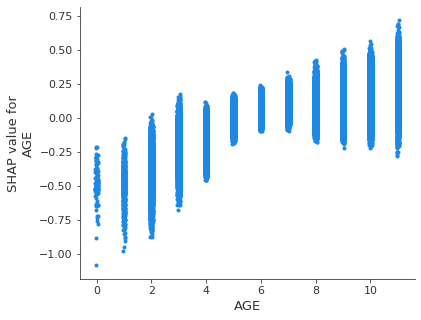

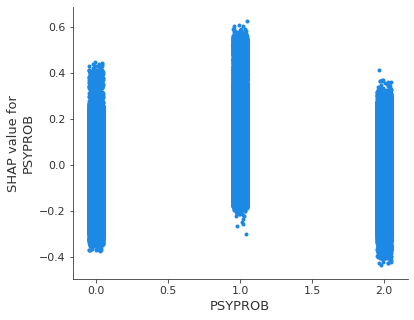

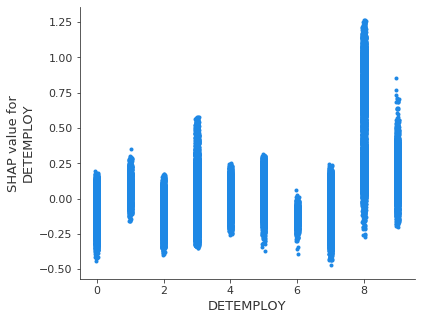

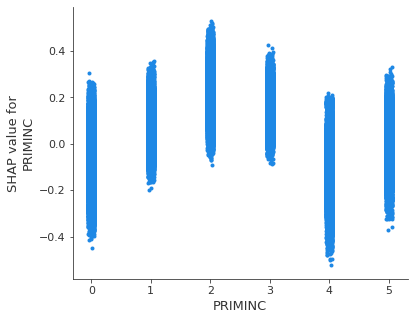

In [49]:
# Show dependence plots for the top n features across all observations
# NOTE: In order to get dependence plot to work, you must revert to matplotlib==3.1.3
# Examples of dependence plots: https://slundberg.github.io/shap/notebooks/plots/dependence_plot.html
top_features = shap_importance['feature_name'][0:15]
for feature in top_features:
    shap.dependence_plot(feature, shap_values.values, X, x_jitter=0.1, interaction_index=None)

In [50]:
shap_importance
# shap_importance.to_csv('shap_importance.csv')

,feature_name,feature_importance,abs_feature_importance
3,SERVICES,1.192367,2.122754e-01
0,STFIPS,0.551131,9.811701e-02
53,REGION,0.420149,7.479845e-02
6,PSOURCE,0.312829,5.569256e-02
5,NOPRIOR,0.257878,4.590960e-02
52,DIVISION,0.243313,4.331658e-02
25,FREQ1,0.174383,3.104521e-02
14,DSMCRIT,0.139683,2.486748e-02
31,HLTHINS,0.133729,2.380765e-02
32,PRIMPAY,0.121739,2.167297e-02


# Grouped feature importance

In [27]:
import pandas as pd
g = pd.read_csv('shap_importance_encoded.csv')
g

,index,feature_name,feature_label,feature_group,feature_importance,abs_feature_importance
0,3,SERVICES,treatment service,coordination of care,1.193486,0.211251
1,0,STFIPS,state code,geographic,0.508349,0.089979
2,53,REGION,census region,geographic,0.459499,0.081333
3,6,PSOURCE,referral source,coordination of care,0.307342,0.054400
4,52,DIVISION,census division,geographic,0.262981,0.046548
5,5,NOPRIOR,prior treatments,medical history,0.253194,0.044816
6,25,FREQ1,primary frequency,substance use history,0.173455,0.030702
7,31,HLTHINS,health insurance,economic,0.152293,0.026956
8,14,DSMCRIT,dsm diagnosis,medical history,0.147015,0.026022
9,32,PRIMPAY,payment source,economic,0.123711,0.021897


In [36]:
g_grouped = g.groupby('feature_group').sum()['abs_feature_importance'].sort_values(ascending=False)
# g_grouped.to_csv('shap_importance_grouped.csv')
g_grouped

feature_group
coordination of care     0.294015
geographic               0.217860
substance use history    0.188242
medical history          0.124106
economic                 0.101604
demographic              0.037786
personal history         0.036387
Name: abs_feature_importance, dtype: float64

In [4]:
g.sort_values(by='abs_feature_importance', ascending=False)[['feature_label', 'abs_feature_importance']].reset_index(drop=True)

,index,feature_label,abs_feature_importance
0,0,treatment service,0.211251
1,1,state code,0.089979
2,2,census region,0.081333
3,3,referral source,0.054400
4,4,census division,0.046548
5,5,prior treatments,0.044816
6,6,primary frequency,0.030702
7,7,health insurance,0.026956
8,8,dsm diagnosis,0.026022
9,9,payment source,0.021897


# Impact of gender on treatment

In [19]:
dfg = df2.copy()
dfg

,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,ARRESTS,METHUSE,PSYPROB,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,DETEMPLOY
0,MD,Unknown,Unknown,AmbulatoryNonIntensiveOutpatient,Unknown,0PriorTreatments,OtherReferral,Unknown,MethUse,Unknown,...,NotReported,NotReported,NotReported,NotReported,NotReported,SouthAtlantic,South,NoIDU,OtherDrugs,OtherNotInLaborForce
1,CT,4yCollegePlus,NeverMarried,Detox24hFreeStandingRes,Unknown,3PriorTreatments,Unknown,0Arrest,NoMethUse,Yes,...,NotReported,NotReported,NotReported,NotReported,NotReported,NewEngland,Northeast,IDU,Alcohol&Drugs,Unemployed
2,CA,Grade9To11,Unknown,AmbulatoryNonIntensiveOutpatient,Unknown,0PriorTreatments,Individual,0Arrest,MethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,Pacific,West,IDU,OtherDrugs,Unemployed
3,NY,Grade9To11,NeverMarried,AmbulatoryNonIntensiveOutpatient,ProbationOrParole,1PriorTreatments,CourtReferral,0Arrest,NoMethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,MiddleAtlantic,Northeast,NoIDU,OtherDrugs,FullTime
4,MD,Grade9To11,NeverMarried,AmbulatoryNonIntensiveOutpatient,Unknown,3PriorTreatments,Individual,0Arrest,MethUse,Yes,...,NotReported,NotReported,NotReported,NotReported,NotReported,SouthAtlantic,South,IDU,OtherDrugs,OtherNotInLaborForce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423481,NY,1To3yCollege,NeverMarried,AmbulatoryNonIntensiveOutpatient,Unknown,1PriorTreatments,Individual,0Arrest,MethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,MiddleAtlantic,Northeast,NoIDU,OtherDrugs,OtherNotInLaborForce
423482,CT,4yCollegePlus,Separated,AmbulatoryNonIntensiveOutpatient,Unknown,4PriorTreatments,Unknown,0Arrest,NoMethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,NewEngland,Northeast,NoIDU,OtherDrugs,FullTime
423483,NJ,Grade12OrGED,NeverMarried,AmbulatoryIntensiveOutpatient,Unknown,5PlusPriorTreatments,DrugCareProvider,0Arrest,MethUse,Yes,...,NotReported,NotReported,NotReported,NotReported,NotReported,MiddleAtlantic,Northeast,IDU,Alcohol&Drugs,OtherNotInLaborForce
423484,AZ,Unknown,Unknown,AmbulatoryNonIntensiveOutpatient,Unknown,0PriorTreatments,OtherHealthCareProvider,0Arrest,MethUse,No,...,NotReported,NotReported,NotReported,NotReported,NotReported,Mountain,West,NoIDU,Alcohol&Drugs,Unknown


In [20]:
def remove_item_from_list(old_list, item):
    new_list = []
    for i in old_list:
        if i != item:
            new_list.append(i)
    return new_list

def add_new_row(dataset, category):
    new_row_list = [category]*len(dataset.columns)
    new_row_series = pd.Series(new_row_list, index=dataset.columns)
    dataset = dataset.append(new_row_series, ignore_index=True)
    return dataset

def add_percent_difference_column(dataset, comparison_col, reference_col):
    numerator = (df_freq[comparison_col]-df_freq[reference_col]).astype("float64")
    denominator = df_freq[reference_col].astype("float64")
    new_col_name = comparison_col + reference_col + 'PercentDifference'
    dataset[new_col_name] = 100*numerator/denominator
    return dataset


In [21]:
# Group dataframe by variable of interest
df_freq = pd.DataFrame()
df_temp = dfg.groupby('GENDER')['METHUSE'].value_counts().unstack(fill_value=0)
df_temp = (df_temp.div(df_temp.sum(axis=1), axis=0) * 100).round(2)
df_temp = add_new_row(df_temp, 'DV')
df_freq = pd.concat([df_freq, df_temp], axis=1)

# Refine list of remaining columns
dfg_columns = dfg.columns.tolist()
dfg_columns = remove_item_from_list(dfg_columns, 'GENDER')
dfg_columns = remove_item_from_list(dfg_columns, 'METHUSE')

# Loop through and columns
for col in dfg_columns:
    # Group by category and calculate the % frequency within each group
    df_temp = dfg.groupby('GENDER')[col].value_counts().unstack(fill_value=0)
    df_temp = (df_temp.div(df_temp.sum(axis=1), axis=0) * 100)
    # Add category, then combine dataframes
    df_temp = add_new_row(df_temp, col)
    df_freq = pd.concat([df_freq, df_temp], axis=1)

# Reverse the row order and transpose
df_freq = df_freq[::-1].reset_index(drop=True)
df_freq = df_freq.transpose()

# Rename index, columns
df_freq = df_freq.reset_index()
df_freq.insert(2, 'Variable', df_freq['index'])
df_freq = df_freq.drop('index', axis=1)
df_freq = df_freq.rename(columns={0:'Category', 1:'Unknown', 2:'Male', 3:'Female'})

# Calculate percent difference
add_percent_difference_column(df_freq, 'Female', 'Male')
df_freq = df_freq.round(2)

df_freq

,Category,Variable,Unknown,Male,Female,FemaleMalePercentDifference
0,DV,MethUse,89.16,48.1,53.08,10.35
1,DV,NoMethUse,10.84,51.9,46.92,-9.60
2,STFIPS,AK,0.0,0.246036,0.437873,77.97
3,STFIPS,AL,0.0,0.890704,1.331387,49.48
4,STFIPS,AR,0.0,0.30519,0.44993,47.43
...,...,...,...,...,...,...
346,DETEMPLOY,RetiredOrDisabled,2.008032,7.280489,8.255489,13.39
347,DETEMPLOY,Student,0.0,0.27957,0.408681,46.18
348,DETEMPLOY,Unemployed,79.718876,35.731402,36.592842,2.41
349,DETEMPLOY,Unknown,2.008032,4.148707,5.580023,34.50


In [26]:
# Group dataframe by variable of interest
df_freq = pd.DataFrame()
df_temp = dfg.groupby('RACE')['METHUSE'].value_counts().unstack(fill_value=0)
df_temp = (df_temp.div(df_temp.sum(axis=1), axis=0) * 100).round(2)
df_temp = add_new_row(df_temp, 'DV')
df_freq = pd.concat([df_freq, df_temp], axis=1)

# Refine list of remaining columns
dfg_columns = dfg.columns.tolist()
dfg_columns = remove_item_from_list(dfg_columns, 'RACE')
dfg_columns = remove_item_from_list(dfg_columns, 'METHUSE')

# Loop through and columns
for col in dfg_columns:
    # Group by category and calculate the % frequency within each group
    df_temp = dfg.groupby('RACE')[col].value_counts().unstack(fill_value=0)
    df_temp = (df_temp.div(df_temp.sum(axis=1), axis=0) * 100)
    # Add category, then combine dataframes
    df_temp = add_new_row(df_temp, col)
    df_freq = pd.concat([df_freq, df_temp], axis=1)

# Reverse the row order and transpose
df_freq = df_freq[::-1].reset_index(drop=True)
df_freq = df_freq.transpose()

# Rename index, columns
df_freq = df_freq.reset_index()
df_freq.insert(2, 'Variable', df_freq['index'])
df_freq = df_freq.drop('index', axis=1)
df_freq = df_freq.rename(columns={0:'Category', 1:'White', 2:'Unknown', 3:'TwoPlusRaces', 4:'PacificIslander', 5:'OtherSingleRace', 6:'Black', 7:'AsianOrPacificIslander', 8:'Asian', 9:'AmericanIndian', 10:'AlaskaNative'})

# Calculate percent difference
add_percent_difference_column(df_freq, 'Black', 'White')
df_freq = df_freq.round(2)

df_freq

,Category,Variable,White,Unknown,TwoPlusRaces,PacificIslander,OtherSingleRace,Black,AsianOrPacificIslander,Asian,AmericanIndian,AlaskaNative,BlackWhitePercentDifference
0,DV,MethUse,49.7,62.37,47.7,45.01,53.26,46.98,45.45,50.88,53.42,54.74,-5.47
1,DV,NoMethUse,50.3,37.63,52.3,54.99,46.74,53.02,54.55,49.12,46.58,45.26,5.41
2,STFIPS,AK,0.280678,0.09319,2.673797,0.457457,0.085827,0.062165,0.0,0.206612,0.330033,55.961071,-77.85
3,STFIPS,AL,1.343098,0.007168,0.430778,0.091491,0.12588,0.65197,0.0,0.309917,0.165017,0.0,-51.46
4,STFIPS,AR,0.463595,0.014337,0.0,0.182983,0.080105,0.156169,0.0,0.206612,0.391914,0.0,-66.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,DETEMPLOY,RetiredOrDisabled,6.32547,4.100358,5.629828,4.117109,8.657092,14.28723,0.0,2.582645,5.301155,4.86618,125.87
340,DETEMPLOY,Student,0.34165,0.37276,0.430778,0.365965,0.25462,0.259272,0.0,0.568182,0.536304,0.243309,-24.11
341,DETEMPLOY,Unemployed,37.741633,35.505376,39.720737,38.792315,28.411627,31.638718,45.454545,30.113636,52.186469,28.467153,-16.17
342,DETEMPLOY,Unknown,4.409435,10.293907,2.406417,3.568161,0.969846,6.992753,0.0,3.409091,4.35231,0.973236,58.59


In [27]:
df_freq[['Category', 'Variable', 'White', 'Black', 'BlackWhitePercentDifference']]

,Category,Variable,White,Black,BlackWhitePercentDifference
0,DV,MethUse,49.7,46.98,-5.47
1,DV,NoMethUse,50.3,53.02,5.41
2,STFIPS,AK,0.280678,0.062165,-77.85
3,STFIPS,AL,1.343098,0.65197,-51.46
4,STFIPS,AR,0.463595,0.156169,-66.31
...,...,...,...,...,...
339,DETEMPLOY,RetiredOrDisabled,6.32547,14.28723,125.87
340,DETEMPLOY,Student,0.34165,0.259272,-24.11
341,DETEMPLOY,Unemployed,37.741633,31.638718,-16.17
342,DETEMPLOY,Unknown,4.409435,6.992753,58.59


In [24]:
# Group dataframe by variable of interest
df_freq = pd.DataFrame()
df_temp = dfg.groupby('LIVARAG')['METHUSE'].value_counts().unstack(fill_value=0)
df_temp = (df_temp.div(df_temp.sum(axis=1), axis=0) * 100).round(2)
df_temp = add_new_row(df_temp, 'DV')
df_freq = pd.concat([df_freq, df_temp], axis=1)

# Refine list of remaining columns
dfg_columns = dfg.columns.tolist()
dfg_columns = remove_item_from_list(dfg_columns, 'LIVARAG')
dfg_columns = remove_item_from_list(dfg_columns, 'METHUSE')

# Loop through and columns
for col in dfg_columns:
    # Group by category and calculate the % frequency within each group
    df_temp = dfg.groupby('LIVARAG')[col].value_counts().unstack(fill_value=0)
    df_temp = (df_temp.div(df_temp.sum(axis=1), axis=0) * 100)
    # Add category, then combine dataframes
    df_temp = add_new_row(df_temp, col)
    df_freq = pd.concat([df_freq, df_temp], axis=1)

# Reverse the row order and transpose
df_freq = df_freq[::-1].reset_index(drop=True)
df_freq = df_freq.transpose()

# Rename index, columns
df_freq = df_freq.reset_index()
df_freq.insert(2, 'Variable', df_freq['index'])
df_freq = df_freq.drop('index', axis=1)
df_freq = df_freq.rename(columns={0:'Category', 1:'Unknown', 2:'IndependentLiving', 3:'Homeless', 4:'DependLiving'})

# Calculate percent difference
add_percent_difference_column(df_freq, 'Homeless', 'IndependentLiving')
add_percent_difference_column(df_freq, 'DependLiving', 'IndependentLiving')
df_freq = df_freq.round(2)

df_freq

,Category,Variable,Unknown,IndependentLiving,Homeless,DependLiving,HomelessIndependentLivingPercentDifference,DependLivingIndependentLivingPercentDifference
0,DV,MethUse,50.94,54.6,37.04,43.93,-32.16,-19.54
1,DV,NoMethUse,49.06,45.4,62.96,56.07,38.68,23.50
2,STFIPS,AK,0.202625,0.306901,0.397389,0.317697,29.48,3.52
3,STFIPS,AL,0.748833,0.934096,0.412499,2.292281,-55.84,145.40
4,STFIPS,AR,0.013215,0.34559,0.211538,0.679476,-38.79,96.61
...,...,...,...,...,...,...,...,...
345,DETEMPLOY,RetiredOrDisabled,2.854374,8.974912,6.726905,4.73657,-25.05,-47.22
346,DETEMPLOY,Student,0.343582,0.347822,0.119368,0.446904,-65.68,28.49
347,DETEMPLOY,Unemployed,25.865563,34.395274,41.694116,40.993524,21.22,19.18
348,DETEMPLOY,Unknown,20.236103,4.834906,1.585023,1.784574,-67.22,-63.09
